In [1]:
import glob
import csv
import os
from tsne import bh_sne
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import StratifiedKFold                                                                                                                       
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
from numpy.random import RandomState
np.random.seed(1)

In [2]:
bytesdir = "Datasets/ByFamilyBytes"

In [3]:
cur_dir = os.getcwd()
os.chdir(bytesdir)  # the parent folder with sub-folders

# Get number of samples per family
list_fams = sorted(os.listdir(os.getcwd()), key=str.lower)  # vector of strings with family names
no_bytes = []  # No. of samples per family
for i in range(len(list_fams)):
    os.chdir(list_fams[i])
    len1 = len(glob.glob('*.bytes'))  # assuming the bytes are stored as 'bytes'
    no_bytes.append(len1)
    os.chdir('..')
num_samples = np.sum(no_bytes)  # total number of all samples

# Compute the labels
y = np.zeros(num_samples)
pos = 0
label = 0
for i in no_bytes:
    print ("Label:%2d\tFamily: %15s\tNumber of bytes: %d" % (label, list_fams[label], i))
    for j in range(i):
        y[pos] = label
        pos += 1
    label += 1
num_classes = label

# Compute the features
width, height,channels = (224,224,3)
X = np.zeros((num_samples, width, height, channels))
cnt = 0
flist = [] # List of bytes paths
print("Processing bytes ...")
for i in range(len(list_fams)):
    for bytes_file in glob.glob(list_fams[i]+'/*.bytes'):
        #print("[%d] Processing bytes: %s" % (cnt, bytes_file))
        flist.append(os.path.join(os.getcwd(),bytes_file))
        cnt += 1
print("bytes processed: %d" %(cnt))

os.chdir(cur_dir)

Label: 0	Family:         allaple	Number of bytes: 362
Label: 1	Family:           alman	Number of bytes: 325
Label: 2	Family:          autoit	Number of bytes: 261
Label: 3	Family:            daws	Number of bytes: 466
Label: 4	Family:            delf	Number of bytes: 359
Label: 5	Family:         gamarue	Number of bytes: 259
Label: 6	Family:          ibryte	Number of bytes: 347
Label: 7	Family:          loring	Number of bytes: 285
Label: 8	Family:          mydoom	Number of bytes: 578
Label: 9	Family:          qukart	Number of bytes: 253
Label:10	Family:          ramnit	Number of bytes: 506
Label:11	Family:          sality	Number of bytes: 1401
Label:12	Family:          simbot	Number of bytes: 1148
Label:13	Family:       softpulse	Number of bytes: 912
Label:14	Family:          viking	Number of bytes: 183
Label:15	Family:         virlock	Number of bytes: 373
Label:16	Family:          vobfus	Number of bytes: 405
Label:17	Family:          wapomi	Number of bytes: 345
Label:18	Family:          

In [4]:
num_samples = len(flist)
print("Number of samples: %i" %(num_samples))

Number of samples: 10136


In [5]:
flist

['/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/a921fa38a7fa9504d51f54892231c91d1b005c7f69659aec141cf8f57bcd53ad.bytes',
 '/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/b86c9000a72def1144387c0581011111a5f05889e34eafc9b88c3e6e3d626aab.bytes',
 '/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/44cd0c3b370404d5e55da778c2631ecbfb11c758384a1b3e70a9a0b8dec034fb.bytes',
 '/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/a220eed28405abfa6d13e69b4fdf6c8b4eafa75ad89b60bdc9ee52d7448d4dd4.bytes',
 '/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/071344b16980a7827636024e708e785a7804923de9f8e4f7470c6c98f184be17.bytes',
 '/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/d10eb7ffb002bd9729f63a668969ac0e674a50d89b5e90397f2e07ebf4246c6d.bytes',
 '/home/edmar/GIT/Malwares/VirusSign/20Classes/ByFamilyBytes/allaple/560f45dc8e85ee5561db0a01a16bbc1a62fcf076487d61364c7b66275fd0dacf.bytes',
 '/hom

In [6]:
vectorizer = CountVectorizer(input='filename', stop_words=None, token_pattern=r'\b\w\w\b', min_df=1)

In [7]:
filename = 'virussign-byte1gram.npy'
if os.path.exists(filename):
    print("Loading Byte1gram extracted features from %s ..." %(filename))
    X = np.load(filename)
else:
    print("Extracting Byte1gram features ...")
    X = vectorizer.fit_transform(flist)
    X = X.todense()    
    print("Saving Byte1gram extracted features into %s ..." %(filename))
    np.save(filename, X)

Extracting Byte1gram features ...
Saving Byte1gram extracted features into virussign-byte1gram.npy ...


In [8]:
X

matrix([[ 1662,   727,   502, ...,   418,   455,   625],
        [ 1533,   617,   390, ...,   215,   207,   222],
        [ 1588,   701,   425, ...,   281,   278,   331],
        ..., 
        [78942,  8615,  3289, ...,  2640,  1620, 10044],
        [84724,  8528,  3231, ...,  2638,  1618,  9480],
        [84834,  8550,  3230, ...,  2648,  1628,  9480]], dtype=int64)

In [9]:
if (np.where(np.isnan(X)))[0].shape[0]: 
    print("X contains nan")
else:
    print("X does not contain nan")

X does not contain nan


In [10]:
X.shape

(10136, 256)

In [11]:
y

array([  0.,   0.,   0., ...,  19.,  19.,  19.])

In [12]:
y.shape

(10136,)

In [13]:
no_bytes

[362,
 325,
 261,
 466,
 359,
 259,
 347,
 285,
 578,
 253,
 506,
 1401,
 1148,
 912,
 183,
 373,
 405,
 345,
 863,
 505]

In [14]:
list_fams

['allaple',
 'alman',
 'autoit',
 'daws',
 'delf',
 'gamarue',
 'ibryte',
 'loring',
 'mydoom',
 'qukart',
 'ramnit',
 'sality',
 'simbot',
 'softpulse',
 'viking',
 'virlock',
 'vobfus',
 'wapomi',
 'zbot',
 'zegost']

In [15]:
print("Running t-SNE ...")
vis_data = bh_sne(np.float64(X), d=2, perplexity=30., theta=0.5, random_state=RandomState(1))
#vis_data = TSNE(n_components=2,random_state=1).fit_transform(X)

Running t-SNE ...


Plotting t-SNE ...


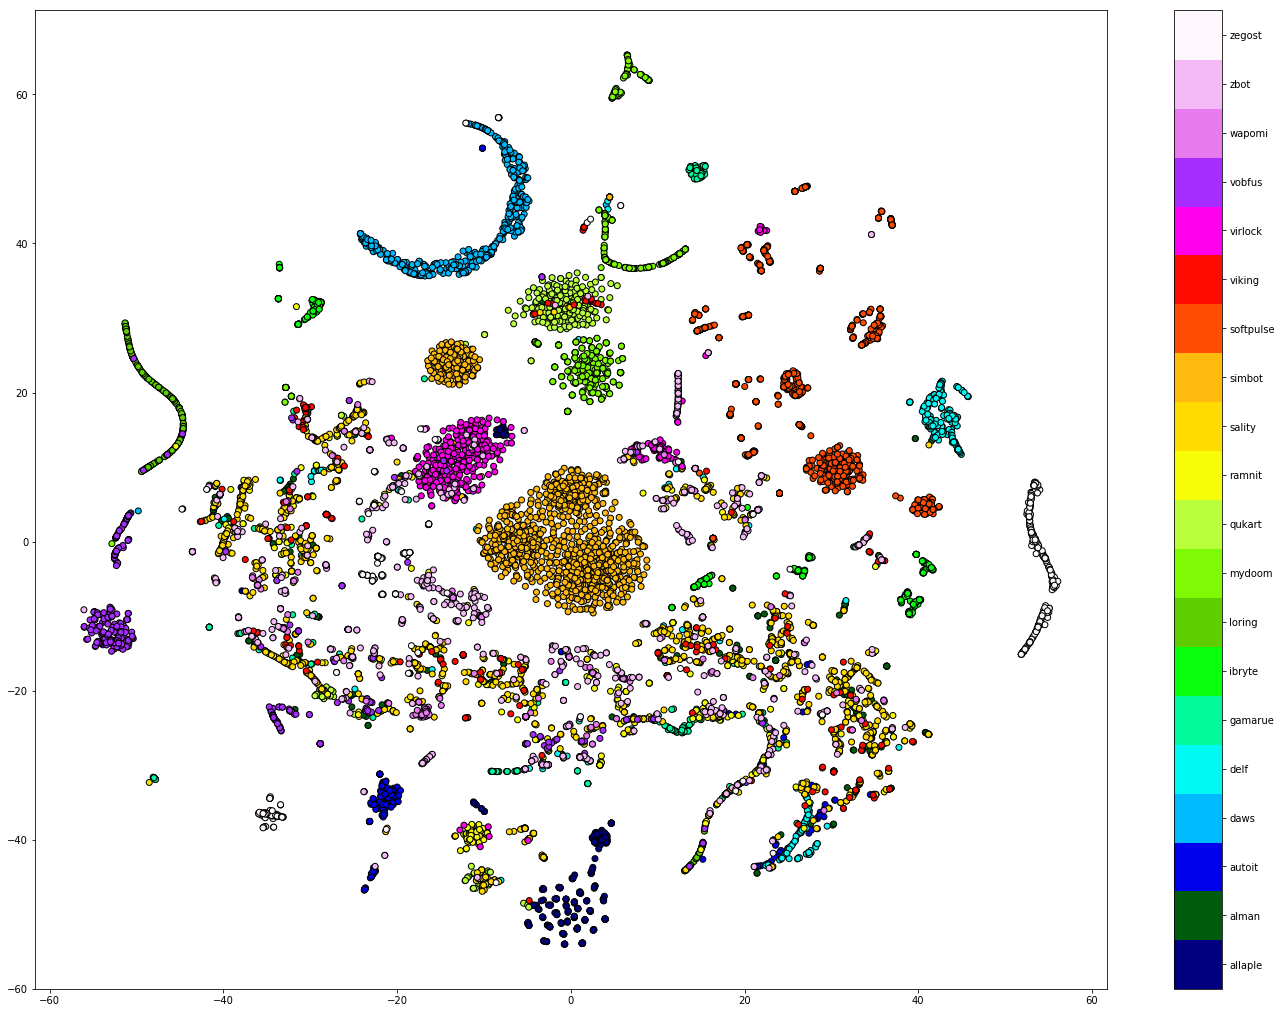

In [16]:
print("Plotting t-SNE ...")
figure = plt.gcf()
figure.set_size_inches(24, 18)
plt.scatter(vis_data[:, 0], vis_data[:, 1], c=y, cmap=plt.cm.get_cmap("gist_ncar", len(list_fams)),edgecolors="black")
plt.clim(-0.5, len(list_fams)-0.5)
cbar = plt.colorbar(ticks=range(len(list_fams)))
cbar.ax.set_yticklabels(list_fams)                     
plt.show()

In [17]:
# Create stratified k-fold subsets                                                                                                                                        
kfold = 10  # no. of folds                                                                 
skf = StratifiedKFold(kfold, shuffle=True,random_state=1)
skfind = [None] * kfold  # skfind[i][0] -> train indices, skfind[i][1] -> test indices
cnt = 0                                              
for index in skf.split(X, y):         
    skfind[cnt] = index                                                 
    cnt += 1 

In [18]:
# Training top_model and saving min training loss weights
n_neighbors = 1
conf_mat = np.zeros((len(list_fams),len(list_fams))) # Initializing the Confusion Matrix
for i in range(kfold):
    train_indices = skfind[i][0]
    test_indices = skfind[i][1]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    top_model = KNeighborsClassifier(n_neighbors, weights='distance',n_jobs=-1)
    top_model.fit(X_train,y_train)  # Training
    y_pred = top_model.predict(X_test)  # Testing
    print("[%d] Test acurracy: %.4f" %(i,accuracy_score(y_test,y_pred)))
    cm = confusion_matrix(y_test,y_pred)  # Compute confusion matrix for this fold
    conf_mat = conf_mat + cm  # Compute global confusion matrix

[0] Test acurracy: 0.8340
[1] Test acurracy: 0.8415
[2] Test acurracy: 0.8363
[3] Test acurracy: 0.8297
[4] Test acurracy: 0.8248
[5] Test acurracy: 0.8437
[6] Test acurracy: 0.8404
[7] Test acurracy: 0.8393
[8] Test acurracy: 0.8380
[9] Test acurracy: 0.8406


In [19]:
# Computing the average accuracy
avg_acc = np.trace(conf_mat)/np.sum(conf_mat)
print("Average acurracy: %.4f" %(avg_acc))

Average acurracy: 0.8368


Plotting the confusion matrix


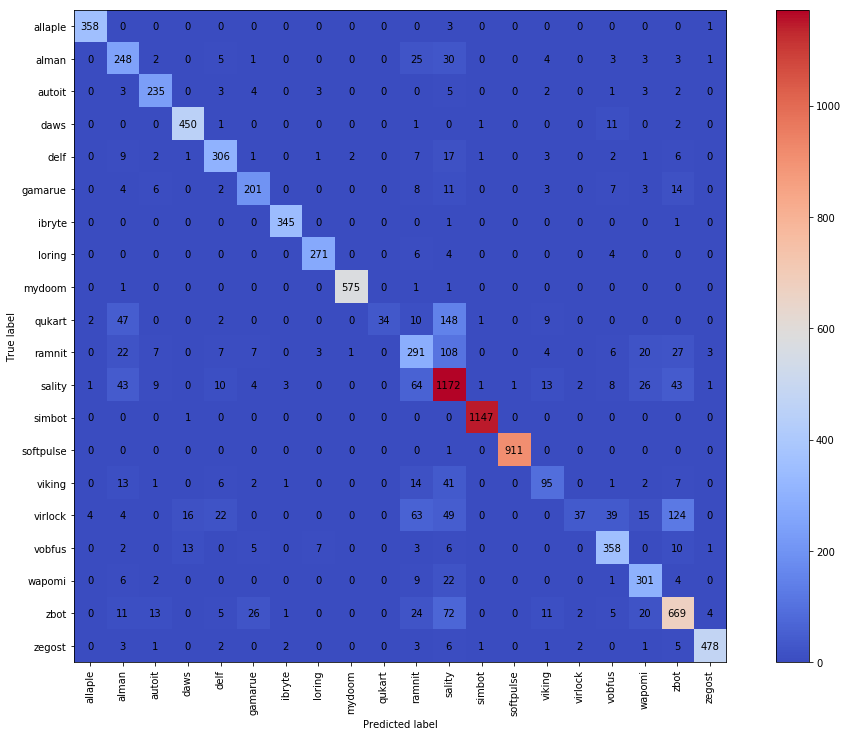

In [20]:
print("Plotting the confusion matrix")
figure = plt.gcf()
figure.set_size_inches(18, 12)
plt.imshow(conf_mat,interpolation='nearest',cmap='coolwarm')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(int(conf_mat[row][col])),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.show()

Plotting the confusion matrix normalized


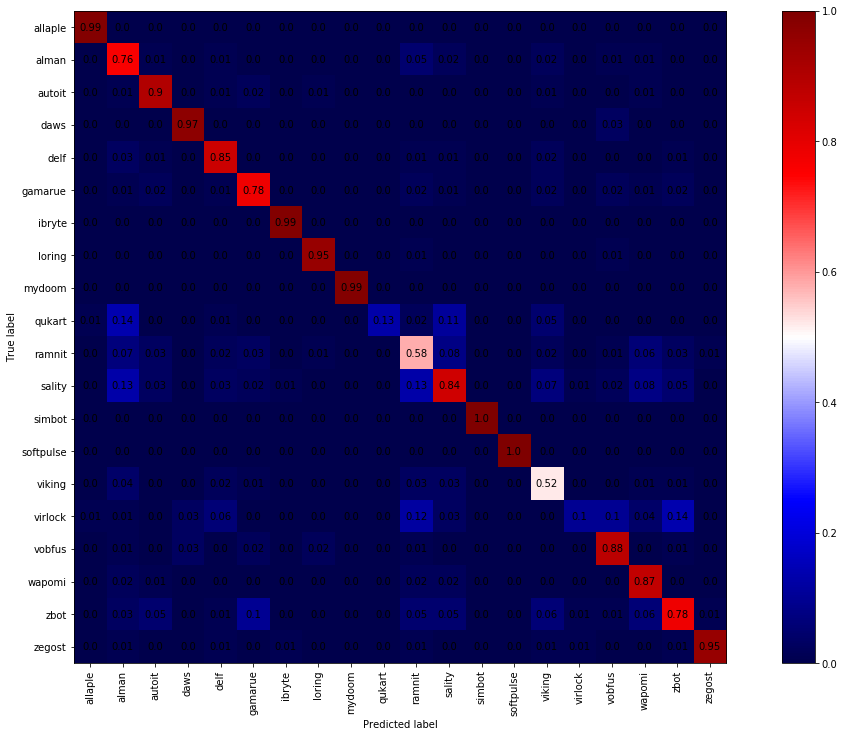

In [21]:
print("Plotting the confusion matrix normalized")
conf_mat_norm = conf_mat/np.sum(conf_mat,axis=1)  # Normalizing the confusion matrix
conf_mat_norm = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(20, 12)
plt.imshow(conf_mat_norm,interpolation='nearest',cmap='seismic')
for row in range(len(list_fams)):
    for col in range(len(list_fams)):
        plt.annotate(str(conf_mat_norm[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.show()

Plotting the confusion matrix normalized


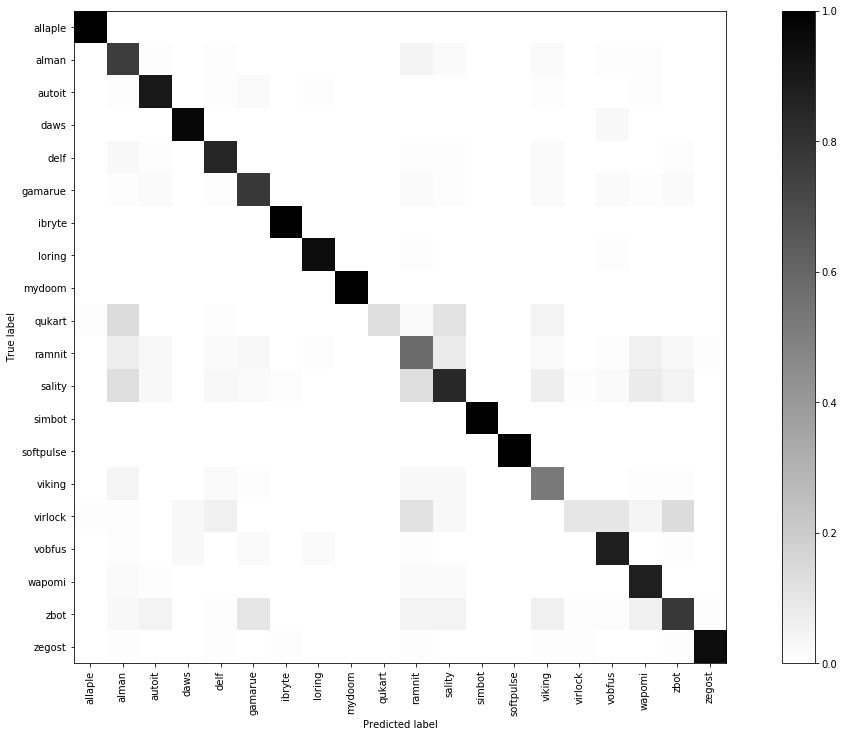

In [22]:
print("Plotting the confusion matrix normalized")
conf_mat_norm = conf_mat/np.sum(conf_mat,axis=1)  # Normalizing the confusion matrix
conf_mat_norm = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure
figure = plt.gcf()
figure.set_size_inches(20, 12)
plt.imshow(conf_mat_norm,interpolation='nearest',cmap='binary')
#for row in range(len(list_fams)):
#    for col in range(len(list_fams)):
#        plt.annotate(str(conf_mat_norm[row][col]),xy=(col,row),ha='center',va='center')
plt.xticks(range(len(list_fams)),list_fams,rotation=90,fontsize=10)
plt.yticks(range(len(list_fams)),list_fams,fontsize=10)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()
plt.show()

Plotting the confusion matrix normalized


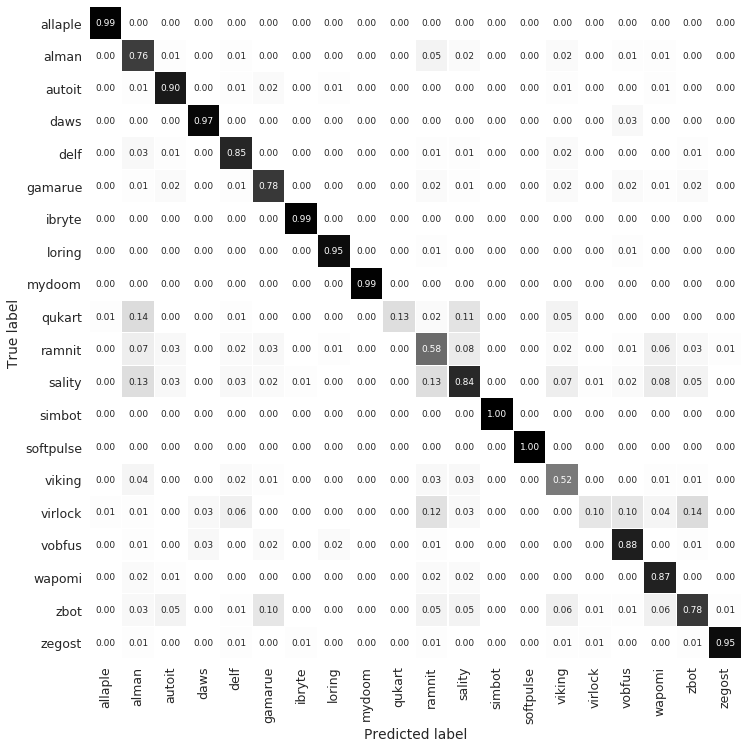

In [23]:
import seaborn as sns

print("Plotting the confusion matrix normalized")
conf_mat_norm = conf_mat/np.sum(conf_mat,axis=1)  # Normalizing the confusion matrix
conf_mat_norm = np.around(conf_mat_norm,decimals=2)  # rounding to display in figure

figure = plt.gcf()
figure.set_size_inches(20, 12)
sns.set(font_scale=1.25)
hm = sns.heatmap(conf_mat_norm, cbar=False, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 9}, linewidth = 0.1, cmap = 'binary',
                 yticklabels=list_fams, xticklabels=list_fams)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()